# Filling with h3 hexagons

In [1]:
import tobler
from shapely.geometry import Polygon
import geopandas
import libpysal

%load_ext watermark
%watermark -v -a "serge rey" -d -u -p tobler,libpysal,geopandas

Author: serge rey

Last updated: 2022-04-15

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.2.0

tobler   : .0.2.1-262.g6360704.dirty
libpysal : 4.6.2
geopandas: 0.10.2



In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 9)

In [3]:
sids2 = libpysal.examples.load_example("SIDS2")
gdf = geopandas.read_file(sids2.get_path("sids2.shp"))

Example not available: SIDS2
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


<AxesSubplot:>

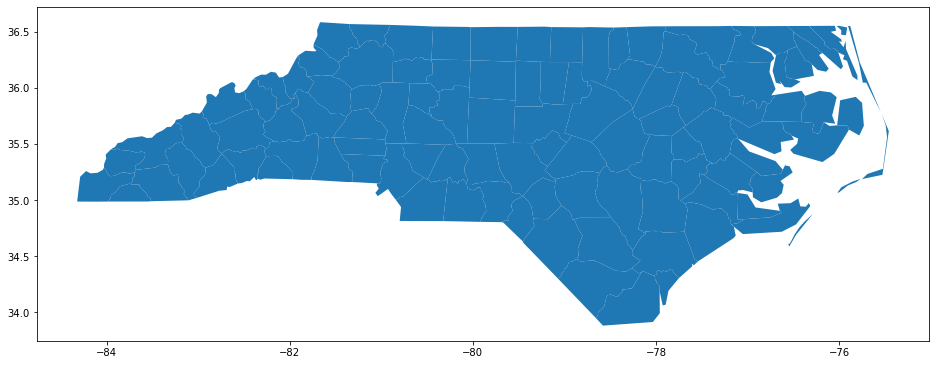

In [4]:
gdf.plot()

In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
h = tobler.util.h3fy(gdf, resolution=6)

<AxesSubplot:>

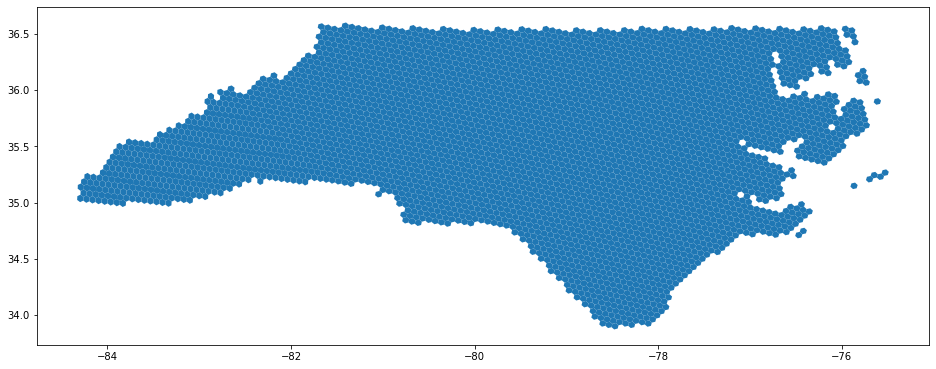

In [7]:
h.plot()

<AxesSubplot:>

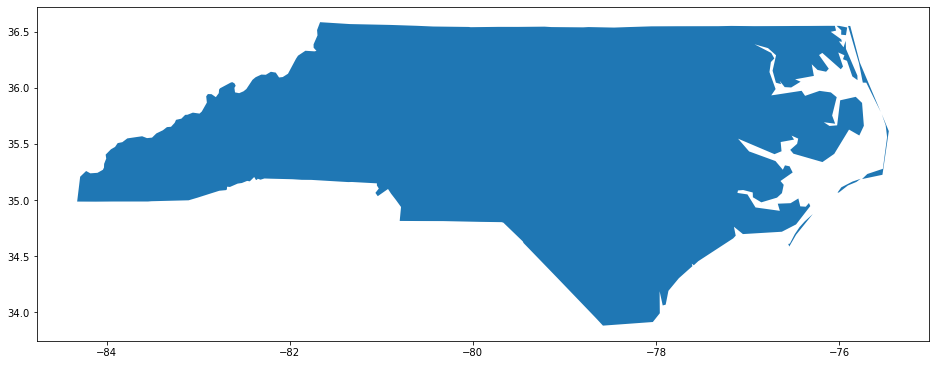

In [8]:
gdfe = gdf.explode(index_parts=True)
gdfe["state"] = "nc"
gdfe.dissolve(by="state").plot()

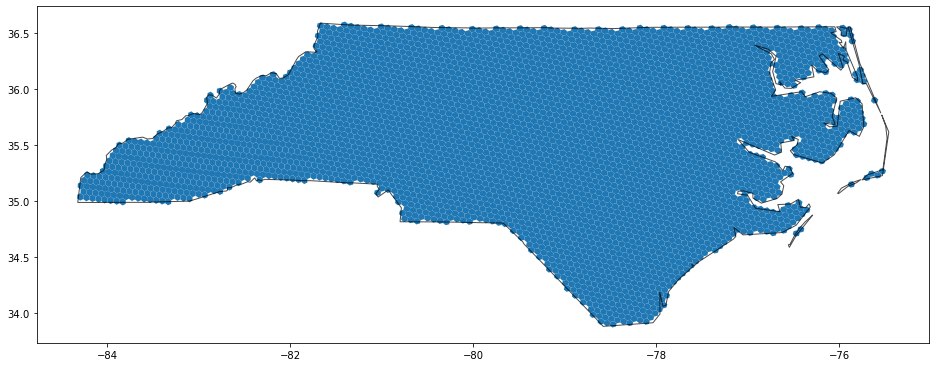

In [9]:
f, ax = plt.subplots(1, 1, figsize=(16, 9))
h.plot(ax=ax)
gdfe.dissolve(by="state").plot(alpha=0.7, facecolor="none", ax=ax);

We see the unfilled spaces near the boundary. This is the issue raised in [#146](https://github.com/pysal/tobler/issues/146).

## Using `buffer`to ensure complete fill

In [10]:
gdfutm = gdf.to_crs(gdf.estimate_utm_crs())

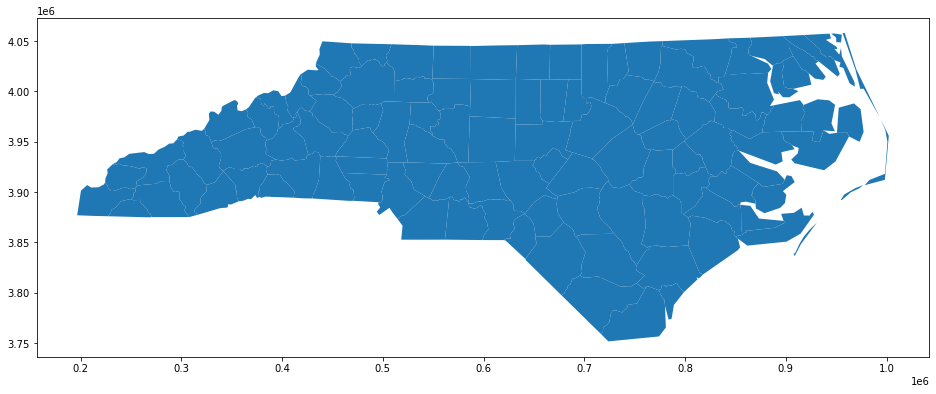

In [11]:
gdfutm.plot(figsize=(16, 9));

In [12]:
h = tobler.util.h3fy(gdfutm, resolution=6)

In [13]:
hb = tobler.util.h3fy(gdfutm, resolution=6, buffer=True)

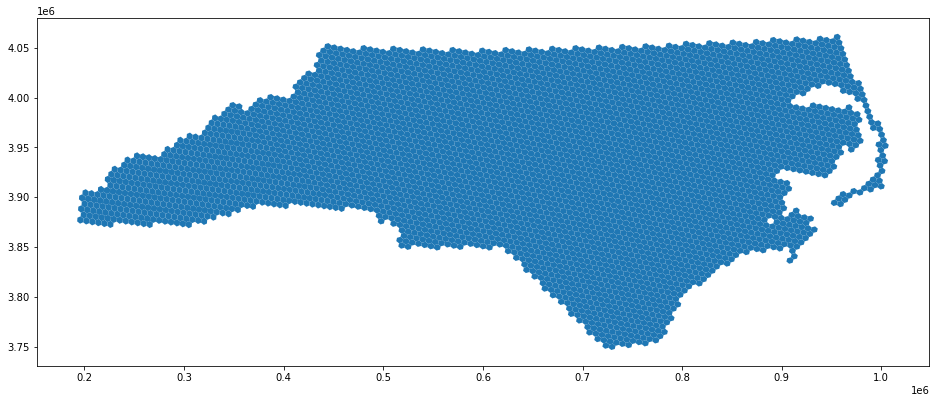

In [14]:
hb.plot();

In [15]:
hbc = tobler.util.h3fy(gdfutm, resolution=6, buffer=True, clip=True)

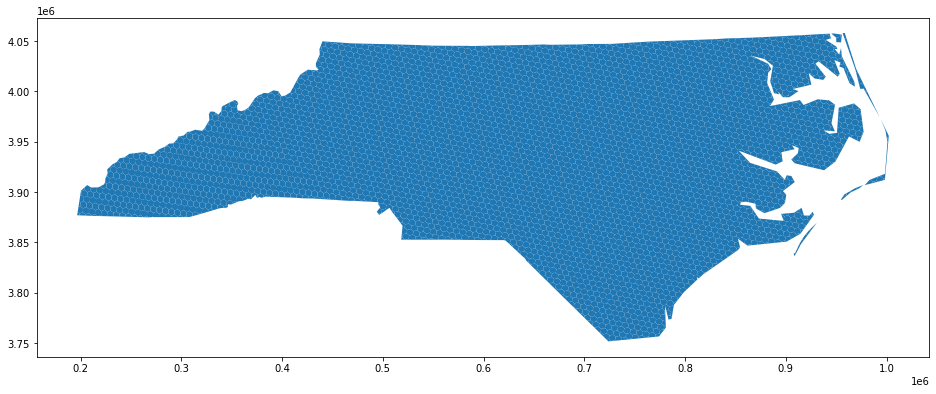

In [16]:
hbc.plot();

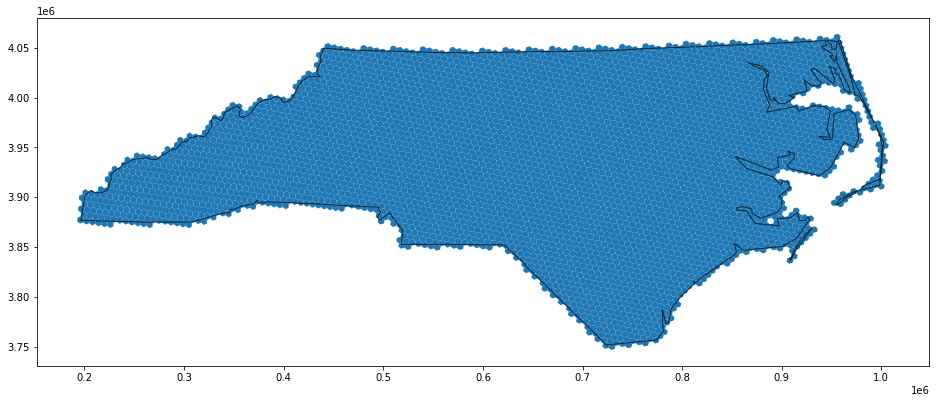

In [17]:
gdfutm["state"] = "nc"
f, ax = plt.subplots(1, 1, figsize=(16, 9))
hb.plot(ax=ax)
gdfutm.dissolve(by="state").plot(alpha=0.7, facecolor="none", ax=ax);

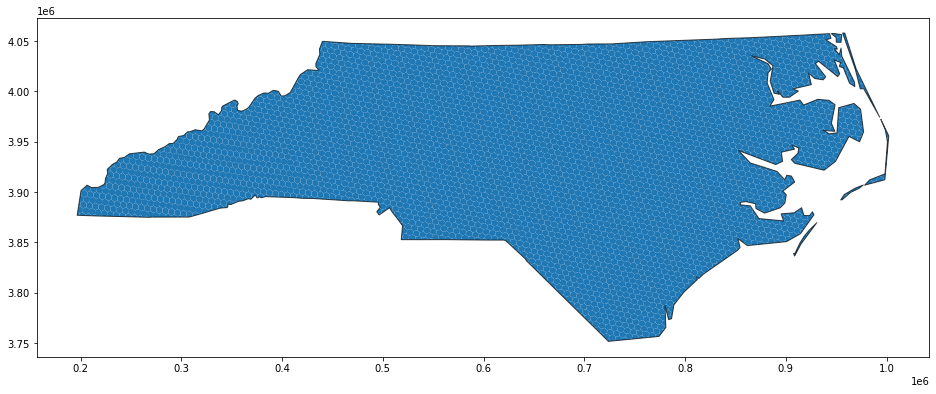

In [18]:
gdfutm["state"] = "nc"
f, ax = plt.subplots(1, 1, figsize=(16, 9))
hbc.plot(ax=ax)
gdfutm.dissolve(by="state").plot(alpha=0.7, facecolor="none", ax=ax);

In [19]:
hbc = tobler.util.h3fy(gdfutm, resolution=5, buffer=True, clip=True)

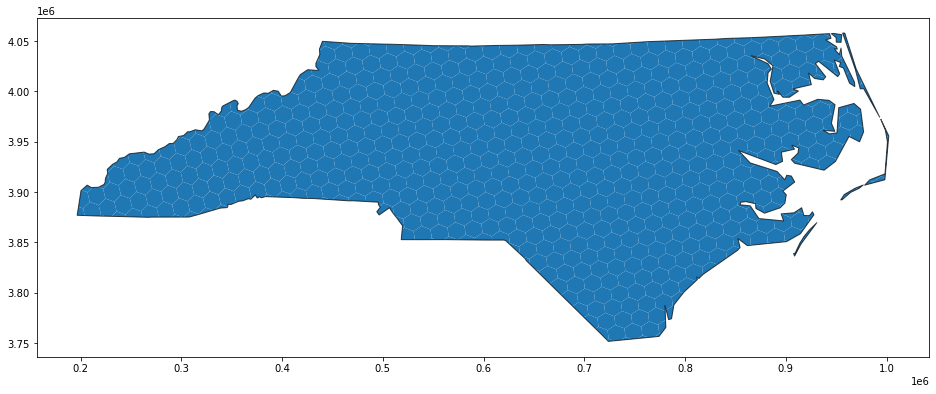

In [20]:
gdfutm["state"] = "nc"
f, ax = plt.subplots(1, 1, figsize=(16, 9))
hbc.plot(ax=ax)
gdfutm.dissolve(by="state").plot(alpha=0.7, facecolor="none", ax=ax);